<a id="top"></a>
<p style="font-size:32px; text-align:center"> Explorations in Envy-Free Allocations  </p>

<p style="font-size:20px; text-align:center"> Chris Landgrebe, Calvin Suster, Wyatt Walsh</p>


This is the accompanying notebook to the paper, _Explorations in Envy-Free Allocations_. Here one can view the results datasets and visualizations created for them. Each dataset from the discussion in the paper are loaded for any further manipulation and can be found with the mapping: 


<center>
    
| Dataset                                                                                                                 | Variable    |
|-------------------------------------------------------------------------------------------------------------------------|-------------|
| [Approximate Envy-Freeness](#approximate-envy-freeness)                                                                 | `aef`       |
| [Approximate Envy-Freeness Up to One Item](#approximate-envy-freeness-up-to-one-item)                                   | `aef1`      |
| [Approximate Envy-Freeness With a Subsidy](#approximate-envy-freeness-with-a-subsidy)                                   | `aefs`      |
| [Approximate Envy-Freeness - Upper-Bound](#approximate-envy-freeness-upper-bound)                                       | `aef_ub`    |
| [Approximate Envy-Freeness - Starting Solution](#approximate-envy-freeness-starting-solution)                           | `aef_ss`    |
| [Approximate Envy-Freeness - Upper-Bound & Starting Solution](#approximate-envy-freeness-upper-bound-starting-solution) | `aef_ub_ss` |
| [Approximate Envy-Freeness - Tuned Solver Parameters](#approximate-envy-freeness-tuned)                                 | `aef_t`     |
    
</center>


The visualizations that were made include:
- a summary of the solver outcomes for all of the datasets in table form
- full outcomes of the solver for the different combinations of people and items
    - This includes a built-in heatmap for the associated p-Envy-Free value, solver time expended, number of people and number of items
- bar chart of solver elapsed time for different values of people, grouped over differing numbers of items
- bar chart of allocation p-Envy-Free value for different values of people, grouped over differing numbers of items
- heat maps of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items
- triangulated surface plots of solver elapsed time and allocation p-Envy-Free value
- scatter plots of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items
- parallel categories diagrams of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items

The functions used to create these visualizations can be found in the python script, `visualizations.py`, located in the `python_functions` directory within the `src` directory.

In [9]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, Image, display
from python_functions.visualization import *

def plot_3d(data, type_of, name=None,save=False):
    fig = plt.figure("{} Triangulated Surface Plot".format(type_of))
    ax = fig.gca(projection='3d')
    ax = ax.plot_trisurf(data['Number of Items'],
                         data['Number of People'],
                         data[type_of],
                         cmap=plt.cm.jet,
                         linewidth=0.01)
    if save:
        if type_of == "Solver Elapsed Time":
            to_save = "time"
        else:
            to_save = 'envy'
        ax.get_figure().savefig("../visualizations/surfaceplots/{}_{}".format(
            name, to_save),
                               dpi=900,
                               bbox_inches='tight')
    return ax


display(
    HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<a id="approximate-envy-freeness"></a>
# Approximate Envy-Freeness

In [2]:
aef = tabular_statistics('../data/output/q1/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness',
                             'Results of MILP for Approximate Envy-Freeness')[0]

In [3]:
results, grouped = tabular_statistics('../data/output/q1/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness',
                             'Results of MILP for Approximate Envy-Freeness')[1:]
display(grouped)

In [4]:
display(results)

<img src="../visualizations/barcharts/aef_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_time.png' width="800"/>
<img src='../visualizations/heatmaps/aef_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_time.png' width="500"/>

In [31]:
%matplotlib widget
plot_3d(aef, "Allocation p-Envy-Free Value")
plot_3d(aef, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef.png' width="800"/>
<img src='../visualizations/parallelcategories/aef_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-up-to-one-item"></a>
# Approximate Envy-Freeness Up to One Item

In [10]:
aef1 = tabular_statistics('../data/output/q2/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness Up to One Item',
                             'Results of MILP for Approximate Envy-Freeness Up to One Item')[0]

In [11]:
results, grouped = tabular_statistics('../data/output/q2/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness Up to One Item',
                             'Results of MILP for Approximate Envy-Freeness Up to One Item')[1:]
display(grouped)

In [17]:
display(results)

<img src='../visualizations/barcharts/aef1_time.png' width="800"/>
<img src='../visualizations/heatmaps/aef1_time.png' width="500"/>

In [19]:
%matplotlib widget
plot_3d(aef1, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef1.png' width="800"/>
<img src='../visualizations/parallelcategories/aef1_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-with-a-subsidy"></a>
# Approximate Envy-Freeness With a Subsidy

[Back to Top](#top)

<a id="approximate-envy-freeness-upper-bound"></a>
# Approximate Envy-Freeness - Upper Bound

In [21]:
aef_ub = tabular_statistics('../data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[0]

In [24]:
 results, grouped = tabular_statistics('../data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[1:]
display(grouped)

In [25]:
display(results)

<img src="../visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_ub_time.png' width="800"/>

In [26]:
%matplotlib widget
plot_3d(aef_ub, 'Allocation p-Envy-Free Value')
plot_3d(aef_ub, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef_ub.png' width="800"/>
<img src='../visualizations/heatmaps/aef_ub_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_ub_time.png' width="500"/>
<img src='../visualizations/parallelcategories/aef_ub_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_ub_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-starting-solution"></a>
# Approximate Envy-Freeness - Starting Solution

In [33]:
aef_ss = tabular_statistics('../data/output/q4/start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Starting Solution')[0]

In [34]:
results, grouped = tabular_statistics('../data/output/q4/start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Starting Solution')[1:]
display(grouped)

In [35]:
display(results)

<img src="../visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_ub_time.png' width="800"/>

In [30]:
%matplotlib widget
plot_3d(aef_ub, 'Allocation p-Envy-Free Value')
plot_3d(aef_ub, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef_ss.png' width="800"/>
<img src='../visualizations/heatmaps/aef_ss_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_ss_time.png' width="500"/>
<img src='../visualizations/parallelcategories/aef_ss_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_ss_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-upper-bound-starting-solution"></a>
# Approximate Envy-Freeness - Upper Bound & Starting Solution

In [36]:
aef_ub_ss = tabular_statistics('../data/output/q4/upper_bound_start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution')[0]

In [37]:
results, grouped = tabular_statistics('../data/output/q4/upper_bound_start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution')[1:]
display(grouped)

In [25]:
display(results)

<img src="../visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_ub_time.png' width="800"/>

In [26]:
%matplotlib widget
plot_3d(aef_ub_ss, 'Allocation p-Envy-Free Value')
plot_3d(aef_ub_ss, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef_ub.png' width="800"/>
<img src='../visualizations/heatmaps/aef_ub_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_ub_time.png' width="500"/>
<img src='../visualizations/parallelcategories/aef_ub_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_ub_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-tuned"></a>
# Approximate Envy-Freeness - Tuned Solver Parameters

In [21]:
aef_ub = tabular_statistics('../data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[0]

In [24]:
 results, grouped = tabular_statistics('../data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[1:]
display(grouped)

In [25]:
display(results)

<img src="../visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_ub_time.png' width="800"/>

In [26]:
%matplotlib widget
plot_3d(aef_ub, 'Allocation p-Envy-Free Value')
plot_3d(aef_ub, 'Solver Elapsed Time');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src='../visualizations/scatterplots/aef_ub.png' width="800"/>
<img src='../visualizations/heatmaps/aef_ub_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_ub_time.png' width="500"/>
<img src='../visualizations/parallelcategories/aef_ub_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_ub_time.png'width="800"/>

[Back to Top](#top)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

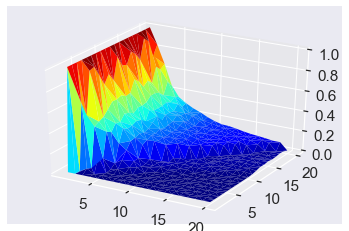

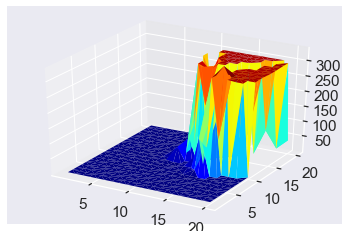

In [22]:
create_bar_plot(aef_ub_ss, "Allocation p-Envy-Free Value", name='aef_ub_ss', save=True)
create_bar_plot(aef_ub_ss, "Solver Elapsed Time", name='aef_ub_ss', save=True)
plot_scatter(aef_ub_ss, "aef_ub_ss", save=True)
heatmap(aef_ub_ss, "Allocation p-Envy-Free Value", name="aef_ub_ss", save=True)
heatmap(aef_ub_ss, "Solver Elapsed Time", name="aef_ub_ss", save=True)
%matplotlib inline
parallel_categories(aef_ub_ss, "Allocation p-Envy-Free Value", name = "aef_ub_ss", save=True)
parallel_categories(aef_ub_ss, "Solver Elapsed Time", name = "aef_ub_ss", save=True)
plot_3d(aef_ub_ss, 'Allocation p-Envy-Free Value', 'aef_ub_ss', True)
plot_3d(aef_ub_ss, 'Solver Elapsed Time', 'aef_ub_ss',True);

In [ ]:
aef = tabular_statistics('../data/output/q1/results.txt',
                             'Summary of Results of MIP for AEF',
                             'Results of MIP for AEF')

<img src="../visualizations/barcharts/aef_envy.png" width="800"/>
<img src='../visualizations/barcharts/aef_time.png' width="800"/>

In [ ]:
%matplotlib widget
plot_3d(aef, 'Allocation p-Envy-Free Value')
plot_3d(aef, 'Solver Elapsed Time');

<img src='../visualizations/scatterplots/aef.png' width="800"/>
<img src='../visualizations/heatmaps/aef_envy.png' width="500"/>
<img src='../visualizations/heatmaps/aef_time.png' width="500"/>
<img src='../visualizations/parallelcategories/aef_envy.png'width="800"/>
<img src='../visualizations/parallelcategories/aef_time.png'width="800"/>

In [ ]:
# import libraries and functions
import imgkit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from IPython.display import HTML, Image, display
from mpl_toolkits.mplot3d import Axes3D

# style Jupyter Notebook output
display(
    HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

In [ ]:
solve_result_mapping = {
    'optimal solution found': 99,
    'optimal solution indicated, but error likely': 199,
    'constraints cannot be satisfied': 299,
    'objective can be improved without limit': 399,
    'stopped by a limit (such as on iterations)': 499,
    'stopped due to solver error': 599
}
columns = [
    'Solver Status', 'Allocation p-Envy-Free Value', 'Solver Elapsed Time',
    'Solver Total Elapsed Time', 'Number of People', 'Number of Items',
    'Associated File Number'
]
styles = [
    dict(selector="caption",
         props=[("text-align", "center"), ("font-size", "120%"),
                ("color", 'black')]), {
                    'props': [("font-family", "Calibri")]
                }, {
                    'selector': 'th',
                    'props': [('text-align', 'center')]
                }
]
cm = sns.light_palette("#003262", as_cmap=True)
pal =  sns.light_palette("#003262")

In [ ]:
def create_bar_plot(data, type_of, name=None, save=False):
    data = data.loc[data['Number of Items'] %
                    2 == 0].loc[data['Number of People'] % 2 == 0]
    g = sns.catplot(x="Number of People",
                    y=type_of,
                    hue="Number of Items",
                    data=data,
                    height=10,
                    aspect=2,
                    kind="bar",
                    palette=sns.color_palette("husl", 20),
                    legend=False)
    plt.legend(title="Number of Items", ncol=2, title_fontsize=24, fontsize=18)
    g.set_ylabels("Log {}".format(type_of), fontsize=24)
    g.set_xlabels("Number of People", fontsize=24)
    g.ax.set_title("{} for Combinations of People and Items".format(type_of),
                   fontsize=28)
    g.set_yticklabels(g.ax.get_yticks(), size=18)
    g.set_xticklabels(size=18)
    g.ax.set_yscale('log')
    if save:
        if type_of == "Solver Elapsed Time":
            to_save = "time"
        else:
            to_save = 'envy'
        plt.savefig("../visualizations/barcharts/{}_{}".format(name, to_save),
                    dpi=900,
                    bbox_inches='tight')
    return g

In [ ]:
def plot_3d(data, type_of):
    fig = plt.figure("{} Triangulated Surface Plot".format(type_of))
    ax = fig.gca(projection='3d')
    ax = ax.plot_trisurf(data['Number of Items'],
                         data['Number of People'],
                         data[type_of],
                         cmap=plt.cm.jet,
                         linewidth=0.01)
    return ax

In [ ]:
def plot_scatter(data, name, save=False):
    people = data.groupby("Number of People").mean().reset_index()
    items = data.groupby('Number of Items').mean().reset_index()

    f, axes = plt.subplots(2, 2, figsize=(10, 10))
    st = plt.suptitle(
        "Mean Allocation p-Envy-Free Value and Mean Solver Elapsed Time for Combinations of People and Items",
        fontsize=16)

    sns.regplot(people['Number of People'],
                people['Allocation p-Envy-Free Value'],
                lowess=True,
                ax=axes[0, 0])
    axes[0, 0].set_ylabel('Mean Allocation p-Envy-Free Value', fontsize=12)

    sns.regplot(items['Number of Items'],
                items['Allocation p-Envy-Free Value'],
                lowess=True,
                ax=axes[0, 1])
    axes[0, 1].set_ylabel('Mean Allocation p-Envy-Free Value', fontsize=12)

    sns.regplot(people['Number of People'],
                people['Solver Elapsed Time'],
                lowess=True,
                ax=axes[1, 0])
    axes[1, 0].set_ylabel('Mean Solver Elapsed Time', fontsize=12)

    sns.regplot(items['Number of Items'],
                items['Solver Elapsed Time'],
                lowess=True,
                ax=axes[1, 1])
    axes[1, 1].set_ylabel('Mean Solver Elapsed Time', fontsize=12)

    axes_list = axes.flatten()
    for ax in axes_list:
        ax.set_xlabel(ax.yaxis.get_label().get_text(), fontsize=12)

    plt.tight_layout()
    st.set_y(0.95)
    f.subplots_adjust(top=0.9)

    if save:
        f.savefig("../visualizations/scatterplots/{}".format(name),
                  dpi=900,
                  bbox_inches='tight',
                  bbox_extra_artists=[st])

In [ ]:
def heatmap(data, type_of, name=None, save=False):
    data = data[['Number of People', 'Number of Items',
                 type_of]].pivot('Number of People', 'Number of Items',
                                 type_of)
    plt.figure(figsize=(12, 10))
    sns.set(font_scale=1.4)
    p = sns.heatmap(data, cmap=cm, linewidths=0.2)
    plt.title("Heatmap of {}".format(type_of), fontsize=24)
    if save:
        if type_of == "Solver Elapsed Time":
            to_save = "time"
        else:
            to_save = 'envy'
        p.get_figure().savefig("../visualizations/heatmaps/{}_{}".format(
            name, to_save),
                               dpi=900,
                               bbox_inches='tight')
    return p

In [ ]:
def parallel_categories(data, type_of, name = None, save=False):
    fig = px.parallel_categories(data, dimensions=['Number of People', "Number of Items"],
                color= type_of, color_continuous_scale=px.colors.sequential.Blues,
                                 title= "Parallel Categories Plot for {}".format(type_of), width=1000, height=500)
    fig.update_layout(title_x=0.5, hoverlabel = None)
    return fig